# **Informe 2 Minería de Datos**
## **Sebastián Novoa Acevedo**

### **Profesor: Andrés Medina**

### **Librerías a importar:**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as ptn
from plotnine import *
import sklearn
import warnings 

warnings.simplefilter("ignore")

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics as mt


### **Presentamos las versiones de las librerías importadas:**

In [42]:
import sys
print('Python version:', sys.version)
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
#print('Matplotlib version:', plt.__version__)
print('Seaborn version:', sns.__version__)
print('Plotnine version:', ptn.__version__)
print('Sklearn version: ', sklearn.__version__)

Python version: 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
Numpy version: 1.19.5
Pandas version: 1.3.3
Seaborn version: 0.11.2
Plotnine version: 0.8.0
Sklearn version:  0.24.2


## **Descripción y Preparación de Datos**

In [43]:
df2 = pd.read_csv('proyectoData.csv') #Cargando el dataset 
#Creamos un dataframe con las variables que utilizaremos en el estudio
#Eliminamos variables con excesiva cantidad de datos nulos que no nos aportan al análisis, como las variables: G, extent,rot_per,GM,BV,UB,IR,spec_B,spec_T
df2=df2[['a','e','i','om','w','q','ad','per_y','data_arc','condition_code','n_obs_used','H','albedo','neo','pha','moid','Danger']]
df2.dropna( inplace=True)
df2.info()

df2['target'] = df2['Danger']
#Transformamos bool a int de la variable Danger
df2['Danger'] = df2['Danger'].replace({True: 1, False: 0})

#Transformamos yes que es Y a 1, no que es N a 0 en la variable pha(posible peligro)
df2.groupby('pha').agg(frequency=('pha', 'count')).head()
df2['pha'] = df2['pha'].replace({'Y': 1, 'N': 0})

#Transformamos yes que es Y a 1, no que es N a 0 en la variable neo(objeto cerca de la Tierra)
df2.groupby('neo').agg(frequency=('neo', 'count')).head()
df2['neo'] = df2['neo'].replace({'Y': 1, 'N': 0})
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98815 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               98815 non-null  float64
 1   e               98815 non-null  float64
 2   i               98815 non-null  float64
 3   om              98815 non-null  float64
 4   w               98815 non-null  float64
 5   q               98815 non-null  float64
 6   ad              98815 non-null  float64
 7   per_y           98815 non-null  float64
 8   data_arc        98815 non-null  float64
 9   condition_code  98815 non-null  int64  
 10  n_obs_used      98815 non-null  int64  
 11  H               98815 non-null  float64
 12  albedo          98815 non-null  float64
 13  neo             98815 non-null  object 
 14  pha             98815 non-null  object 
 15  moid            98815 non-null  float64
 16  Danger          98815 non-null  bool   
dtypes: bool(1), float64(12), int64(

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,albedo,neo,pha,moid,Danger,target
0,3.069911,0.096918,10.633999,344.778698,248.285216,2.772381,3.367440,5.378941,17571.0,0,902,14.0,0.243,0,0,1.78504,1,True
1,3.126769,0.101765,14.228075,93.358911,74.972094,2.808575,3.444963,5.529068,6793.0,0,1128,13.6,0.061,0,0,1.85923,1,True
2,3.240195,0.114902,13.278967,230.808838,255.060949,2.867890,3.612501,5.832637,5367.0,0,246,15.4,0.028,0,0,1.92025,1,True
3,3.118650,0.062830,8.379401,225.435675,212.341581,2.922706,3.314594,5.507545,8046.0,0,978,14.1,0.136,0,0,1.94124,1,True
4,3.032740,0.104018,3.158993,315.183440,183.530613,2.717281,3.348198,5.281544,21144.0,0,373,15.5,0.046,0,0,1.73110,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.670063,0.134364,16.550615,103.041992,353.103112,2.311303,3.028823,4.363052,6175.0,0,442,15.7,0.109,0,0,1.32895,1,True
99996,3.003917,0.097908,10.039414,49.125131,302.969306,2.709811,3.298024,5.206431,13231.0,0,1751,13.4,0.256,0,0,1.72091,1,True
99997,3.054121,0.045967,1.787741,222.936419,150.882122,2.913732,3.194511,5.337497,6347.0,0,138,16.5,0.023,0,0,1.91316,1,True
99998,3.157728,0.186746,25.300444,178.902788,97.637852,2.568034,3.747421,5.611387,9350.0,0,146,15.6,0.033,0,0,1.69556,1,True


### **Dividimos la data**

In [44]:
train, test = train_test_split(df2, train_size=0.7)

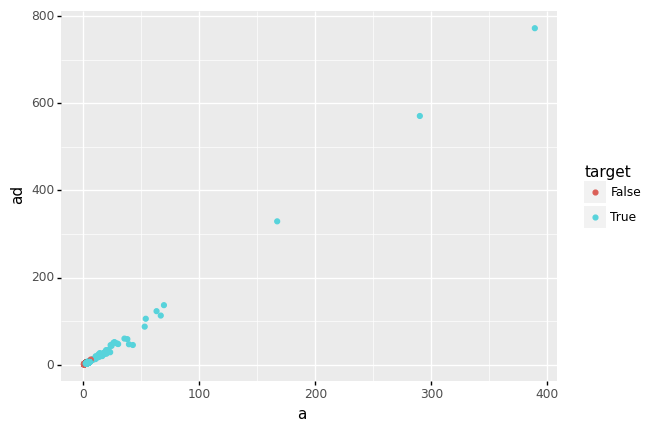

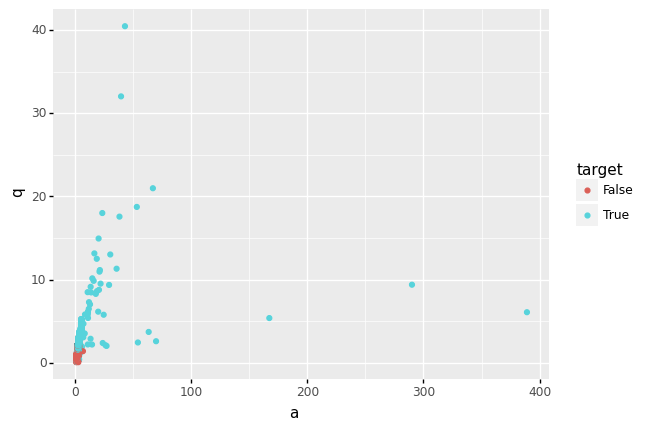

In [45]:
settings = {
    'categoricals': ['pha', 'neo']
    ,'numericals': ["q","ad","per_y","data_arc","condition_code","n_obs_used","H","albedo","moid"]
    ,'model_parameters': {
        'n_neighbors': 3
    }
}

y_var = 'target'
X_var = settings['categoricals'] + settings['numericals']
categoricals = settings['categoricals']
numericals =  settings['numericals']

# datos
X_train = train[X_var]
y_train = train[y_var]
X_test = test[X_var]
y_test = test[y_var]


testData=pd.DataFrame(X_test,columns=df2.columns)
testData["Labels"]=y_test
print(ggplot(df2)+aes(x="a", y="ad", color ='target')+ geom_point()+geom_point(data=testData,color="black"))

print(ggplot(df2)+aes(x="a", y="q", color ='target')
 +geom_point()+geom_point(data=testData,color="blue"))


# **MÉTODO SELECCIONADO: KNN**

### **Empezamos con un KNN genérico, para poder tener indicios de como aplicar el modelo**

In [46]:
# Se crea el objeto KNeighborsClassifier() OJO QUE ESTE MODELO ES UN EJEMPLO PARA LOS DATOS Y K = 3 FUE TOMADO DE FORMA ALEATORIA
KNN = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')

# Entreno el modelo con los datos 
KNN = KNN.fit(X_train, y_train)

result = KNN.predict(X_train)

In [47]:
# Resultado de la prediccion 
print("Resultado de la predicción:\n", result)
print("Largo de la predicción: ", len(result))

Resultado de la predicción:
 [ True  True  True ...  True  True  True]
Largo de la predicción:  69170


In [48]:
# Resultado Original 
print("Resultado original:\n",y_test)

Resultado original:
 88344    True
80236    True
20487    True
29494    True
44483    True
         ... 
73157    True
54868    True
7649     True
60324    True
90290    True
Name: target, Length: 29645, dtype: bool


In [49]:
# Aplico el modelo a otros datos 
result2 = KNN.predict_proba(X_train)
print("Resultado de la predicción:\n", result2)
print("Largo de la predicción: ", len(result2))

Resultado de la predicción:
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Largo de la predicción:  69170


### **Métricas de este modelo de prueba**

In [50]:
print("Accuracy del modelo:", mt.accuracy_score(y_train, result))
print("Precisión del modelo, para la clase 0 (binaria):", mt.precision_score(y_train == 0, result == 0, pos_label=1, average="binary"))
print("Precisión del modelo, para la clase 1 (binaria):", mt.precision_score(y_train == 1, result == 1, pos_label=1, average="binary"))
print("Precisión del modelo, para cada clase:", mt.precision_score(y_train,result,labels=[0,1],average=None))

Accuracy del modelo: 0.9291166690761891
Precisión del modelo, para la clase 0 (binaria): 0.7662642521797451
Precisión del modelo, para la clase 1 (binaria): 0.9364537378376745
Precisión del modelo, para cada clase: [0.76626425 0.93645374]


In [51]:
print("Precisión del modelo, para cada clase:", mt.precision_score(y_train,result,labels=[0,1],average=None))
print("Recall del modelo para cada clase:", mt.recall_score(y_train,result,labels=[0,1],average=None))
print("F1-score del modelo para cada clase:", mt.f1_score(y_train,result,labels=[0,1],average=None))

Precisión del modelo, para cada clase: [0.76626425 0.93645374]
Recall del modelo para cada clase: [0.35202588 0.98887985]
F1-score del modelo para cada clase: [0.48242373 0.96195302]


### **Haremos 30 iteraciones variando el K desde 1 hasta 30 para ver con qué valor es mejor clasificar**

In [52]:
max_k = 30

resultados_precision_1 = []
resultados_precision_2 = []
resultados_F1_1 = []
resultados_F1_2 = []
resultados_accuracy = []

for i in range(max_k):
    KNN = KNeighborsClassifier(n_neighbors = i + 1, weights="uniform")
    KNN = KNN.fit(X_train, y_train)
    result = KNN.predict(X_train)
    resultados_precision_1.append(mt.precision_score(y_train,result,labels=[0],average=None))
    resultados_F1_1.append(mt.f1_score(y_train,result,labels=[0],average=None))
    resultados_precision_2.append(mt.precision_score(y_train,result,labels=[1],average=None))
    resultados_F1_2.append(mt.f1_score(y_train,result,labels=[1],average=None))
    resultados_accuracy.append(mt.accuracy_score(y_train,result))
    print(f"Accuracy del modelo CON K = {i+1}:", mt.accuracy_score(y_train,result))
    print(f"Precisión del modelo, para cada clase CON K = {i+1}:", mt.precision_score(y_train,result,labels=[0,1],average=None))
    print(f"F1-score del modelo para cada clase CON K = {i+1}:", mt.f1_score(y_train,result,labels=[0,1],average=None), "\n")
    


Accuracy del modelo CON K = 1: 1.0
Precisión del modelo, para cada clase CON K = 1: [1. 1.]
F1-score del modelo para cada clase CON K = 1: [1. 1.] 

Accuracy del modelo CON K = 2: 0.9335260951279456
Precisión del modelo, para cada clase CON K = 2: [0.58535486 1.        ]
F1-score del modelo para cada clase CON K = 2: [0.73845279 0.96192448] 

Accuracy del modelo CON K = 3: 0.9291166690761891
Precisión del modelo, para cada clase CON K = 3: [0.76626425 0.93645374]
F1-score del modelo para cada clase CON K = 3: [0.48242373 0.96195302] 

Accuracy del modelo CON K = 4: 0.9220471302587827
Precisión del modelo, para cada clase CON K = 4: [0.62132921 0.9431166 ]
F1-score del modelo para cada clase CON K = 4: [0.5107078  0.95765002] 

Accuracy del modelo CON K = 5: 0.9191267890704062
Precisión del modelo, para cada clase CON K = 5: [0.74203994 0.92400137]
F1-score del modelo para cada clase CON K = 5: [0.32957814 0.95696791] 

Accuracy del modelo CON K = 6: 0.9176810756108139
Precisión del mod

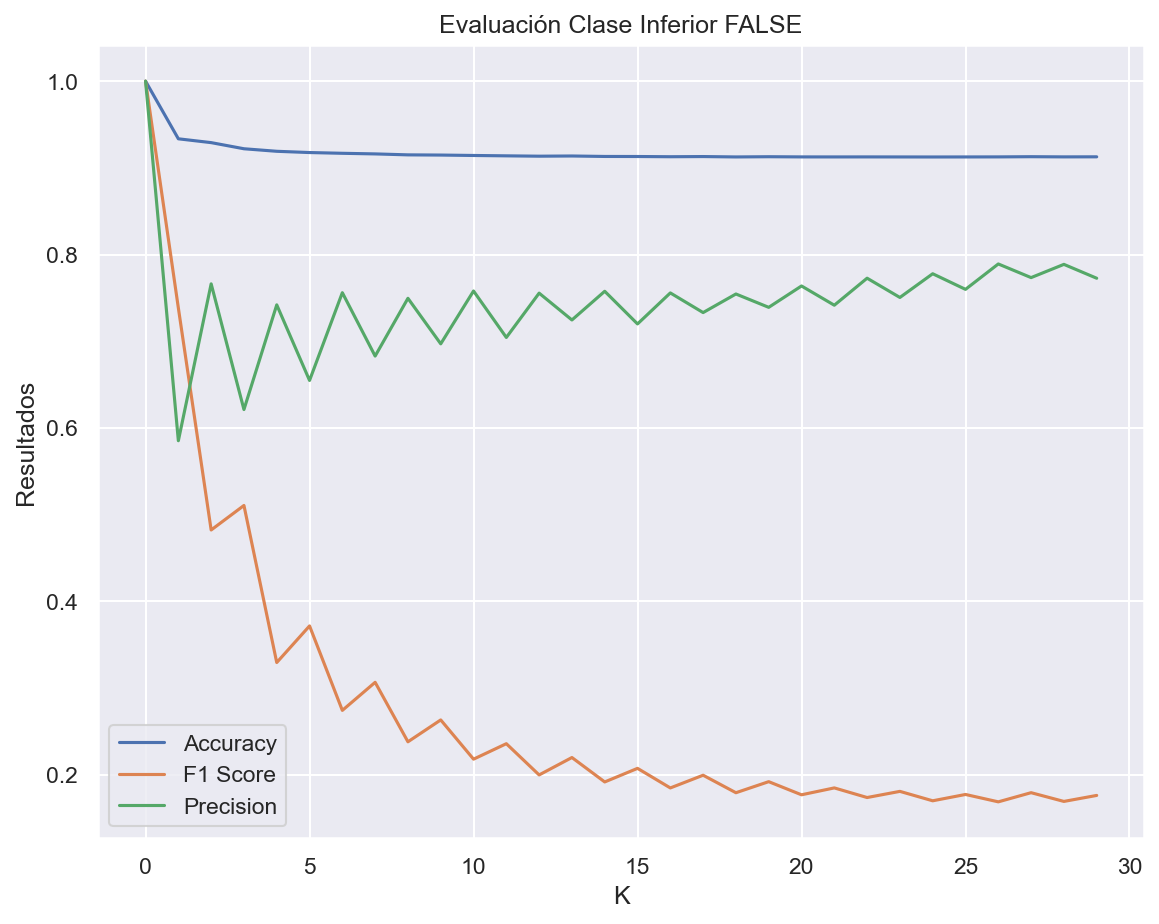

In [53]:
plt.figure(dpi=150)
plt.plot(resultados_accuracy, label = 'Accuracy')
plt.plot(resultados_F1_1, label = 'F1 Score')
plt.plot(resultados_precision_1, label = 'Precision')
plt.legend()
plt.xlabel('K')
plt.ylabel('Resultados')
plt.title('Evaluación Clase Inferior FALSE')
plt.savefig('EVALUACIÓN CLASE INFERIOR FALSE')
plt.show()


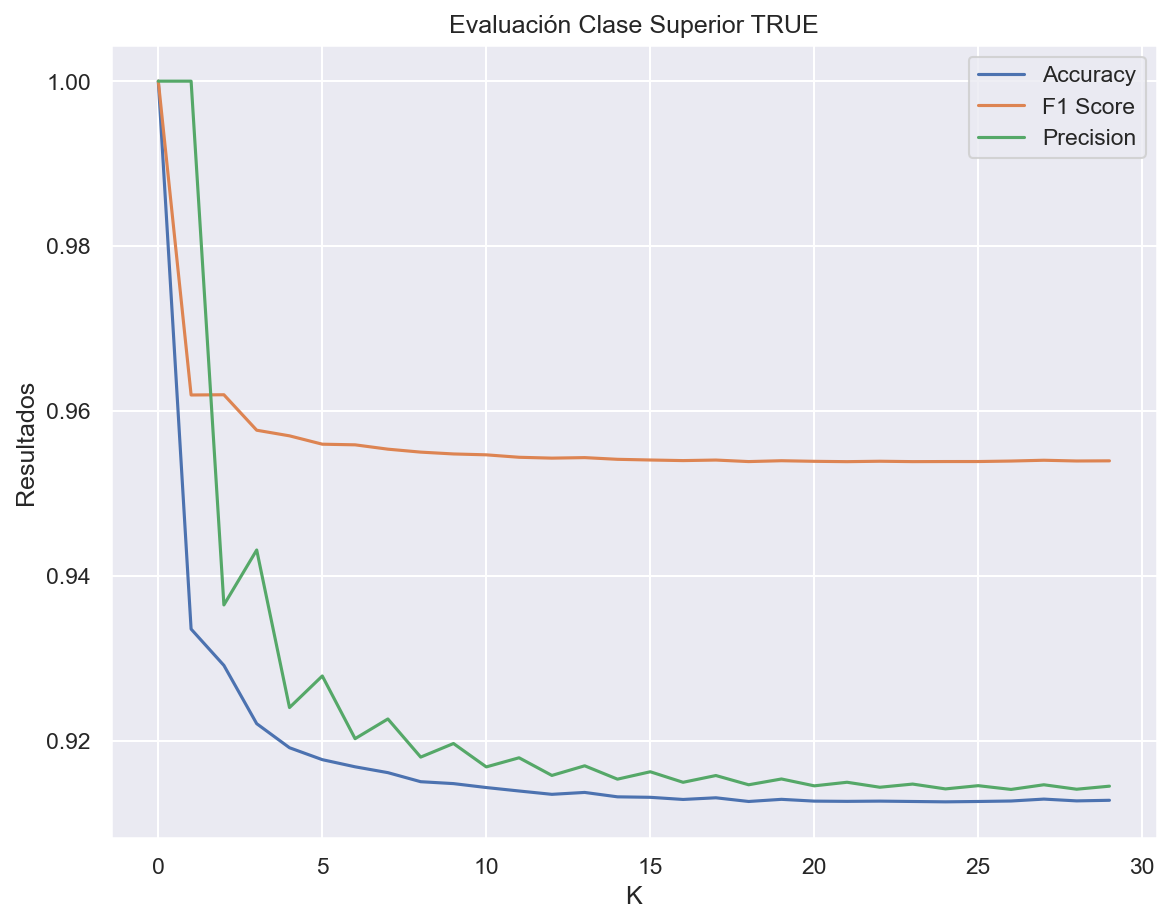

In [54]:
plt.figure(dpi=150)
plt.plot(resultados_accuracy, label = 'Accuracy')
plt.plot(resultados_F1_2, label = 'F1 Score')
plt.plot(resultados_precision_2, label = 'Precision')
plt.legend()
plt.xlabel('K')
plt.ylabel('Resultados')
plt.title('Evaluación Clase Superior TRUE')
plt.savefig('EVALUACION CLASE SUPERIOR TRUE')
plt.show()

### **El mejor F1-Score fue con K = 3, por lo tanto, volvemos a ese modelo**

In [55]:
# Volvemos al mejor modelo con K = 3
KNN = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')

# Entreno el modelo con los datos 
KNN = KNN.fit(X_train, y_train)

result = KNN.predict(X_train)

### **Calculamos curva ROC para ver falsos positivos**

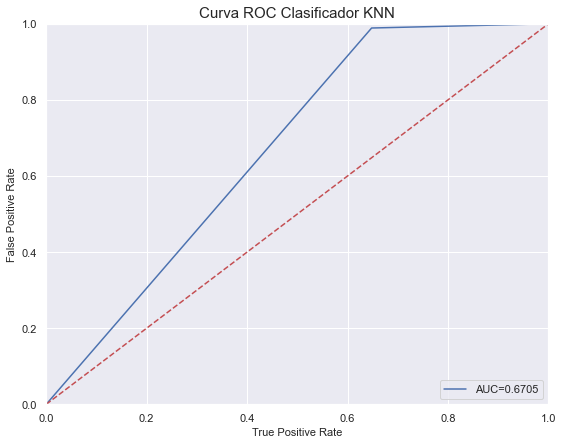

In [56]:
# Calculando los tpr and fpr

sns.set(rc={'figure.figsize':(9,7)})

fpr, tpr, thresholds = mt.roc_curve(y_train,result)

roc_auc = mt.auc(fpr, tpr)
plt.title('Curva ROC Clasificador KNN', fontsize=15)
plt.plot(fpr, tpr, 'b', label='AUC=%0.4f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.savefig("ROC KNN K IGUAL 3.png")
plt.show()

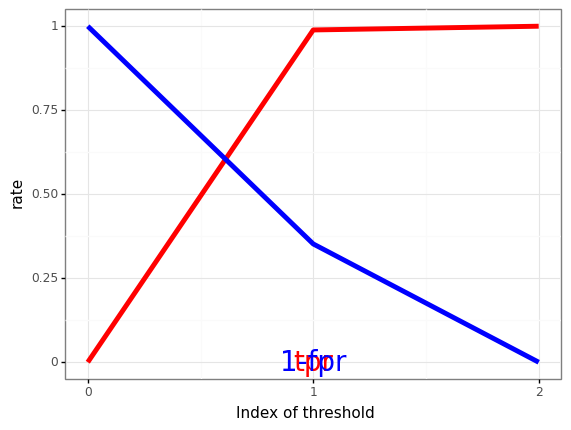

<ggplot: (181141778363)>

In [57]:
(
    ggplot() + aes(x = range(len(thresholds))) +
    theme_bw() +
    geom_line(aes(y=tpr),color="red",size=2) +
    geom_line(aes(y=1-fpr),color="blue",size=2) + 
    annotate("text",label="tpr",x=1,y=0,color="red",size=20) + 
    annotate("text",label="1-fpr",x=len(thresholds)-2,y=0,color="blue",size=20) +
    scale_x_continuous(breaks=range(len(thresholds))) + 
    labs(x="Index of threshold",y="rate")
)

# **Calculamos las métricas finales de nuestro modelo, incluyendo sensibilidad y exactitud**

In [58]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def analisis(y_train,result):
    #Ahora calculamos la precisión del modelo

    precision = precision_score(y_train, result)
    print('\nPrecisión del modelo:', precision)

    #También es necesario que calculemos la exactitud
    
    exactitud = accuracy_score(y_train,result)
    print('\nAccuracy del modelo:', exactitud)

    #Agregamos la sensibilidad

    sensibilidad = recall_score(y_train,result)
    print('\nRecall del modelo:', sensibilidad)

    #Y por último calculamos el F1 Score

    f1 = f1_score(y_train,result)
    print('\nF1-Score:', f1)

    #Además agregamos el calculo de la curva de ROC

    roc_auc=roc_auc_score(y_train,result)
    print('\nROC:',roc_auc)

analisis(y_train,result)


Precisión del modelo: 0.9364537378376745

Accuracy del modelo: 0.9291166690761891

Recall del modelo: 0.9888798481149986

F1-Score: 0.961953021332071

ROC: 0.6704528650527235
